In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', np.nan],
    'Age': [25, 30, np.nan, 28, 32],
    'City': ['New York', 'Paris', 'London', 'Tokyo', 'Sydney'],
    'Salary': [150000, 60000, 70000, 55000, 65000]
}

df = pd.DataFrame(data)

# View the DataFrame
print("DataFrame:")
print(df)

DataFrame:
      Name   Age      City  Salary
0    Alice  25.0  New York  150000
1      Bob  30.0     Paris   60000
2  Charlie   NaN    London   70000
3    David  28.0     Tokyo   55000
4      NaN  32.0    Sydney   65000


<Axes: >

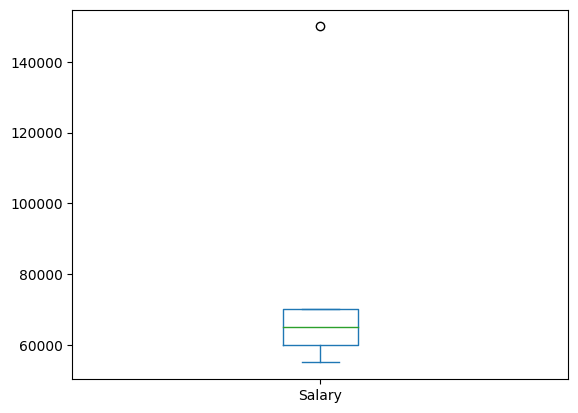

In [ ]:
df['Salary'].plot(kind='box')

### **Handling outlier**

In [ ]:
print("Handling Outlier")
q1=df["Salary"].quantile(0.25)
q3=df["Salary"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

df_outlier_removed=df[(df["Salary"]>=lower_bound) & (df["Salary"]<=upper_bound)]

print(df_outlier_removed)

Handling Outlier
      Name   Age    City  Salary
1      Bob  30.0   Paris   60000
2  Charlie   NaN  London   70000
3    David  28.0   Tokyo   55000
4      NaN  32.0  Sydney   65000


In [ ]:
df.to_csv("df_outlier_removed.csv", index=False)

### **Data Manipulation**

In [ ]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', np.nan],
    'Age': [25, 30, np.nan, 28, 32],
    'City': ['New York', 'Paris', 'London', 'Tokyo', 'Sydney'],
    'Salary': [50000, 60000, 70000, 55000, 65000]
}

df = pd.DataFrame(data)

# View the DataFrame
print("DataFrame:")
print(df)

DataFrame:
      Name   Age      City  Salary
0    Alice  25.0  New York   50000
1      Bob  30.0     Paris   60000
2  Charlie   NaN    London   70000
3    David  28.0     Tokyo   55000
4      NaN  32.0    Sydney   65000


#### **1)apply()**

In [ ]:
## create a new variable

df['Age2']=df["Age"].apply(lambda x: x*2)
df

,Name,Age,City,Salary,Age2
0,Alice,25.0,New York,50000,50.0
1,Bob,30.0,Paris,60000,60.0
2,Charlie,NaN,London,70000,NaN
3,David,28.0,Tokyo,55000,56.0
4,NaN,32.0,Sydney,65000,64.0


In [ ]:
### Applying Function to the columns

def categorize_age (age):
  if age<30:
    return "Young"
  elif 30<=age<40:
    return "Adult"
  else:
    return "Senior"

df["AgeGroup"]=df["Age"].apply(categorize_age)
df

,Name,Age,City,Salary,Age2,AgeGroup
0,Alice,25.0,New York,50000,50.0,Young
1,Bob,30.0,Paris,60000,60.0,Adult
2,Charlie,NaN,London,70000,NaN,Senior
3,David,28.0,Tokyo,55000,56.0,Young
4,NaN,32.0,Sydney,65000,64.0,Adult


### Merging the data frames


In [ ]:
data2={
  "City":["New York","London"],
  "Population":[8500000, 3400000]}

In [ ]:
df2=pd.DataFrame(data2)

In [ ]:
merge=pd.merge(df,df2,on="City", how="left")
merge

,Name,Age,City,Salary,Age2,AgeGroup,Population
0,Alice,25.0,New York,50000,50.0,Young,8500000.0
1,Bob,30.0,Paris,60000,60.0,Adult,NaN
2,Charlie,NaN,London,70000,NaN,Senior,3400000.0
3,David,28.0,Tokyo,55000,56.0,Young,NaN
4,NaN,32.0,Sydney,65000,64.0,Adult,NaN


### **Selecting and Filtering**

In [ ]:
## 1. Boolean Indexing

df_bool=df[df["Age"]>30]
df_bool

,Name,Age,City,Salary,Age2,AgeGroup
4,NaN,32.0,Sydney,65000,64.0,Adult


In [ ]:
### Multiple condition

df_bool_m=df[(df["City"]=="New York") & (df["Salary"]>3000)]

In [ ]:
### loc Accessor

df_loc=df.loc[df["Age"]>20,["Name","City"]]
df_loc

,Name,City
0,Alice,New York
1,Bob,Paris
3,David,Tokyo
4,NaN,Sydney


In [ ]:
### iloc Accessor

df_iloc=df.iloc[[1,2],[0,1]]
df_iloc

,Name,Age
1,Bob,30.0
2,Charlie,NaN


In [ ]:
df['Age_doubled']=df["Age"]*2
df

,Name,Age,City,Salary,Age2,AgeGroup,Age_doubled
0,Alice,25.0,New York,50000,50.0,Young,50.0
1,Bob,30.0,Paris,60000,60.0,Adult,60.0
2,Charlie,NaN,London,70000,NaN,Senior,NaN
3,David,28.0,Tokyo,55000,56.0,Young,56.0
4,NaN,32.0,Sydney,65000,64.0,Adult,64.0


In [ ]:
df["Salary_Bonus"]=df["Salary"]+5000
df

,Name,Age,City,Salary,Age2,AgeGroup,Age_doubled,Salary_Bonus
0,Alice,25.0,New York,50000,50.0,Young,50.0,55000
1,Bob,30.0,Paris,60000,60.0,Adult,60.0,65000
2,Charlie,NaN,London,70000,NaN,Senior,NaN,75000
3,David,28.0,Tokyo,55000,56.0,Young,56.0,60000
4,NaN,32.0,Sydney,65000,64.0,Adult,64.0,70000


In [ ]:
df['Is_Elderly']=df["Age"]>60
df

,Name,Age,City,Salary,Age2,AgeGroup,Age_doubled,Salary_Bonus,Is_Elderly
0,Alice,25.0,New York,50000,50.0,Young,50.0,55000,False
1,Bob,30.0,Paris,60000,60.0,Adult,60.0,65000,False
2,Charlie,NaN,London,70000,NaN,Senior,NaN,75000,False
3,David,28.0,Tokyo,55000,56.0,Young,56.0,60000,False
4,NaN,32.0,Sydney,65000,64.0,Adult,64.0,70000,False


In [ ]:
df['Is_high_income']=(df["Salary"]>70000) | (df["City"]=="New York")
df

,Name,Age,City,Salary,Age2,AgeGroup,Age_doubled,Salary_Bonus,Is_Elderly,Is_high_income
0,Alice,25.0,New York,50000,50.0,Young,50.0,55000,False,True
1,Bob,30.0,Paris,60000,60.0,Adult,60.0,65000,False,False
2,Charlie,NaN,London,70000,NaN,Senior,NaN,75000,False,False
3,David,28.0,Tokyo,55000,56.0,Young,56.0,60000,False,False
4,NaN,32.0,Sydney,65000,64.0,Adult,64.0,70000,False,False


### **Data Grouping or Aggregation**

In [ ]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', np.nan],
    'Age': [25, 30, np.nan, 28, 32],
    'City': ['New York', 'Paris', 'Paris', 'New York', 'New York'],
    'Salary': [50000, 60000, 70000, 55000, 65000]
}

df = pd.DataFrame(data)

# View the DataFrame
print("DataFrame:")
print(df)

DataFrame:
      Name   Age      City  Salary
0    Alice  25.0  New York   50000
1      Bob  30.0     Paris   60000
2  Charlie   NaN     Paris   70000
3    David  28.0  New York   55000
4      NaN  32.0  New York   65000


In [ ]:
group_df=df.groupby("City")["Salary"].mean()
group_df


City
New York    56666.666667
Paris       65000.000000
Name: Salary, dtype: float64

In [ ]:
#### Aggregation

df_agg=df.groupby("City")["Salary"].agg(["mean","median","max","min"])
df_agg

,mean,median,max,min
City,,,,
New York,56666.666667,55000.0,65000,50000
Paris,65000.000000,65000.0,70000,60000


In [ ]:
### Transfroming the data types

df["Salary"]=df["Salary"].astype(int)
df

,Name,Age,City,Salary
0,Alice,25.0,New York,50000
1,Bob,30.0,Paris,60000
2,Charlie,NaN,Paris,70000
3,David,28.0,New York,55000
4,NaN,32.0,New York,65000


In [ ]:
df.rename(columns={"Salary":"Income"}, inplace=True)

In [ ]:
df

,Name,Age,City,Income
0,Alice,25.0,New York,50000
1,Bob,30.0,Paris,60000
2,Charlie,NaN,Paris,70000
3,David,28.0,New York,55000
4,NaN,32.0,New York,65000


### **Working with a dataset**

In [ ]:
data=pd.read_csv("covid.csv")
data.head(2)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-02-23,AK,290.0,NaN,0,NaN,1260.0,1260.0,38.0,9,...,1653425.0,4640,NaN,NaN,NaN,NaN,NaN,0,1653425.0,4640
1,2021-02-23,AL,9660.0,7575.0,68,2085.0,45250.0,45250.0,762.0,122,...,2265086.0,4825,NaN,NaN,115256.0,NaN,2265086.0,4825,NaN,0


In [ ]:
pd.read_excel("data.xlsx",sheet_name="Sheet1")

pd.read_json("df.json")

pd.read_parquet("df.parquet")
pd.read_sas("")

pd.read_spss("df.sav")

In [ ]:
!ls

covid.csv  df_outlier_removed  df_outlier_removed.csv  sample_data


In [ ]:
!mkdir pandas

In [ ]:
!ls

covid.csv  df_outlier_removed  df_outlier_removed.csv  pandas  sample_data


In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir("pandas")

In [ ]:
os.getcwd()

'/content/pandas'

In [ ]:
!ls

covid.csv


In [ ]:
covid_df=pd.read_csv("covid.csv")

In [ ]:
covid_df.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-02-23,AK,290.0,NaN,0,NaN,1260.0,1260.0,38.0,9,...,1653425.0,4640,NaN,NaN,NaN,NaN,NaN,0,1653425.0,4640
1,2021-02-23,AL,9660.0,7575.0,68,2085.0,45250.0,45250.0,762.0,122,...,2265086.0,4825,NaN,NaN,115256.0,NaN,2265086.0,4825,NaN,0
2,2021-02-23,AR,5377.0,4321.0,14,1056.0,14617.0,14617.0,545.0,47,...,2609837.0,4779,NaN,NaN,NaN,436309.0,NaN,0,2609837.0,4779
3,2021-02-23,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-02-23,AZ,15650.0,13821.0,148,1829.0,57072.0,57072.0,1515.0,78,...,7478323.0,19439,435091.0,NaN,NaN,NaN,3709365.0,6212,7478323.0,19439


In [ ]:
len(covid_df)

20108

In [ ]:
covid_df.shape

(20108, 41)

In [ ]:
covid_df.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20108 entries, 0 to 20107
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              20108 non-null  object 
 1   state                             20108 non-null  object 
 2   death                             19230 non-null  float64
 3   deathConfirmed                    9407 non-null   float64
 4   deathIncrease                     20108 non-null  int64  
 5   deathProbable                     7249 non-null   float64
 6   hospitalized                      12435 non-null  float64
 7   hospitalizedCumulative            12435 non-null  float64
 8   hospitalizedCurrently             16702 non-null  float64
 9   hospitalizedIncrease              20108 non-null  int64  
 10  inIcuCumulative                   3648 non-null   float64
 11  inIcuCurrently                    11030 non-null  float64
 12  nega

In [ ]:
covid_df.describe()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
count,19230.000000,9407.000000,20108.000000,7249.000000,12435.000000,12435.000000,16702.000000,20108.000000,3648.000000,11030.000000,...,2.000600e+04,20108.000000,4604.000000,3.146000e+03,1811.000000,939.000000,8.904000e+03,2.010800e+04,1.340400e+04,2.010800e+04
mean,3500.500624,3482.964601,24.498856,388.324872,10894.789867,10894.789867,1202.387020,42.749552,1860.788651,357.389574,...,2.040582e+06,17231.037597,152900.536924,2.686660e+05,141513.062949,153591.400426,9.242205e+05,2.758912e+03,2.260072e+06,1.283705e+04
std,5959.535751,3970.362837,59.514726,501.534437,17255.212783,17255.212783,2082.181692,213.225911,1877.529448,593.114246,...,4.140028e+06,33238.279313,187239.659156,3.741479e+05,170220.886689,132933.649942,1.353812e+06,2.195395e+04,4.234157e+06,3.909861e+04
min,0.000000,0.000000,-201.000000,0.000000,1.000000,1.000000,0.000000,-4124.000000,6.000000,0.000000,...,0.000000e+00,-194215.000000,0.000000,1.000000e+00,1.000000,3.000000,0.000000e+00,-1.122327e+06,0.000000e+00,-1.154583e+06
25%,152.000000,477.500000,0.000000,72.000000,988.000000,988.000000,168.000000,0.000000,479.000000,61.000000,...,9.323125e+04,1074.000000,17765.000000,1.700675e+04,42170.000000,34343.000000,1.378798e+05,0.000000e+00,1.645438e+05,0.000000e+00
50%,1042.000000,2142.000000,6.000000,210.000000,4670.000000,4670.000000,535.000000,0.000000,1258.000000,171.000000,...,6.052765e+05,5968.000000,80982.000000,1.061260e+05,86536.000000,131236.000000,4.058435e+05,0.000000e+00,7.836605e+05,1.432500e+03
75%,4151.750000,5041.500000,23.000000,410.000000,12470.500000,12470.500000,1295.000000,37.000000,2389.000000,379.000000,...,2.114858e+06,18703.250000,216860.500000,3.819570e+05,139022.000000,233430.000000,1.173336e+06,2.564250e+03,2.474755e+06,1.213225e+04
max,49563.000000,20689.000000,2559.000000,2538.000000,89995.000000,89995.000000,22851.000000,16373.000000,8967.000000,5225.000000,...,4.751337e+07,473076.000000,997580.000000,2.341176e+06,946648.000000,543942.000000,1.089583e+07,8.982590e+05,4.751337e+07,2.164543e+06


### **Week 12: L2. Pandas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("covid.csv")
data.head(2)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-02-23,AK,290.0,NaN,0,NaN,1260.0,1260.0,38.0,9,...,1653425.0,4640,NaN,NaN,NaN,NaN,NaN,0,1653425.0,4640
1,2021-02-23,AL,9660.0,7575.0,68,2085.0,45250.0,45250.0,762.0,122,...,2265086.0,4825,NaN,NaN,115256.0,NaN,2265086.0,4825,NaN,0


In [ ]:
data.shape

(20108, 41)

In [ ]:
data.describe().transpose() #T

,count,mean,std,min,25%,50%,75%,max
death,19230.0,3.500501e+03,5.959536e+03,0.0,152.00,1042.0,4151.75,49563.0
deathConfirmed,9407.0,3.482965e+03,3.970363e+03,0.0,477.50,2142.0,5041.50,20689.0
deathIncrease,20108.0,2.449886e+01,5.951473e+01,-201.0,0.00,6.0,23.00,2559.0
deathProbable,7249.0,3.883249e+02,5.015344e+02,0.0,72.00,210.0,410.00,2538.0
hospitalized,12435.0,1.089479e+04,1.725521e+04,1.0,988.00,4670.0,12470.50,89995.0
hospitalizedCumulative,12435.0,1.089479e+04,1.725521e+04,1.0,988.00,4670.0,12470.50,89995.0
hospitalizedCurrently,16702.0,1.202387e+03,2.082182e+03,0.0,168.00,535.0,1295.00,22851.0
hospitalizedIncrease,20108.0,4.274955e+01,2.132259e+02,-4124.0,0.00,0.0,37.00,16373.0
inIcuCumulative,3648.0,1.860789e+03,1.877529e+03,6.0,479.00,1258.0,2389.00,8967.0
inIcuCurrently,11030.0,3.573896e+02,5.931142e+02,0.0,61.00,171.0,379.00,5225.0


In [ ]:
data.columns

Index(['date', 'state', 'death', 'deathConfirmed', 'deathIncrease',
       'deathProbable', 'hospitalized', 'hospitalizedCumulative',
       'hospitalizedCurrently', 'hospitalizedIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'negativeTestsAntibody', 'negativeTestsPeopleAntibody',
       'negativeTestsViral', 'onVentilatorCumulative', 'onVentilatorCurrently',
       'positive', 'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'

In [ ]:
sub_covid_df=pd.read_csv("covid.csv", usecols=['date','state','death','positive','negative','totalTestResults'],
                         parse_dates=['date'], infer_datetime_format=True
                         )

<ipython-input-8-a6159e24edec>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sub_covid_df=pd.read_csv("covid.csv", usecols=['date','state','death','positive','negative','totalTestResults'],


In [ ]:
sub_covid_df.head()

,date,state,death,negative,positive,totalTestResults
0,2021-02-23,AK,290.0,NaN,55560.0,1653425.0
1,2021-02-23,AL,9660.0,1882180.0,488973.0,2265086.0
2,2021-02-23,AR,5377.0,2359571.0,316593.0,2609837.0
3,2021-02-23,AS,0.0,2140.0,0.0,2140.0
4,2021-02-23,AZ,15650.0,2953210.0,810658.0,7478323.0


In [ ]:
sub_covid_df.columns

Index(['date', 'state', 'death', 'negative', 'positive', 'totalTestResults'], dtype='object')

In [ ]:
### Renaming your variable names

sub_covid_df.columns=['date2', 'states', 'Number of death', 'negative2', 'positive2', 'totalTestResults2']

In [ ]:
sub_covid_df.head()

,date2,states,Number of death,negative2,positive2,totalTestResults2
0,2021-02-23,AK,290.0,NaN,55560.0,1653425.0
1,2021-02-23,AL,9660.0,1882180.0,488973.0,2265086.0
2,2021-02-23,AR,5377.0,2359571.0,316593.0,2609837.0
3,2021-02-23,AS,0.0,2140.0,0.0,2140.0
4,2021-02-23,AZ,15650.0,2953210.0,810658.0,7478323.0


In [ ]:
sub_covid_df=pd.read_csv("covid.csv", usecols=['date','state','death','positive','negative','totalTestResults'],
                         parse_dates=['date'], infer_datetime_format=True
                         )

<ipython-input-14-a6159e24edec>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sub_covid_df=pd.read_csv("covid.csv", usecols=['date','state','death','positive','negative','totalTestResults'],


###  **Subsetting, slicing**

#### **Rows**

In [ ]:
sub_covid_df.shape

(20108, 6)

In [ ]:
sub_covid_df[30:40]

,date,state,death,negative,positive,totalTestResults
30,2021-02-23,NC,10965.0,9249147.0,846284.0,10095431.0
31,2021-02-23,ND,1468.0,303267.0,99416.0,1395829.0
32,2021-02-23,NE,2050.0,758267.0,199402.0,2323010.0
33,2021-02-23,NH,1155.0,571901.0,73923.0,1413885.0
34,2021-02-23,NJ,22978.0,9674485.0,772267.0,10446752.0
35,2021-02-23,NM,3644.0,2444482.0,183335.0,2627817.0
36,2021-02-23,NV,4903.0,1106648.0,291543.0,2678249.0
37,2021-02-23,NY,38031.0,NaN,1591585.0,36760944.0
38,2021-02-23,OH,16968.0,NaN,958153.0,9830863.0
39,2021-02-23,OK,4227.0,3009878.0,420212.0,3430090.0


In [ ]:
sub_covid_df[-40:-30]

,date,state,death,negative,positive,totalTestResults
20068,2020-02-01,MA,NaN,NaN,NaN,4.0
20069,2020-02-01,VA,NaN,NaN,NaN,NaN
20070,2020-02-01,WA,NaN,NaN,2.0,0.0
20071,2020-01-31,FL,NaN,NaN,0.0,4.0
20072,2020-01-31,MA,NaN,NaN,NaN,4.0
20073,2020-01-31,VA,NaN,NaN,NaN,NaN
20074,2020-01-31,WA,NaN,NaN,2.0,0.0
20075,2020-01-30,FL,NaN,NaN,0.0,1.0
20076,2020-01-30,MA,NaN,NaN,NaN,4.0
20077,2020-01-30,VA,NaN,NaN,NaN,NaN


In [ ]:
sub_covid_df[::5]

,date,state,death,negative,positive,totalTestResults
0,2021-02-23,AK,290.0,NaN,55560.0,1653425.0
5,2021-02-23,CA,49563.0,NaN,3450058.0,47513367.0
10,2021-02-23,FL,30749.0,9051605.0,1844228.0,21264199.0
15,2021-02-23,ID,1826.0,494773.0,169584.0,632561.0
20,2021-02-23,LA,9503.0,5020119.0,426048.0,5446167.0
...,...,...,...,...,...,...
20085,2020-01-28,WA,NaN,NaN,2.0,0.0
20090,2020-01-26,WA,NaN,NaN,2.0,0.0
20095,2020-01-23,MA,NaN,NaN,NaN,2.0
20100,2020-01-20,WA,NaN,NaN,1.0,NaN


### **Columns**

In [ ]:
sub_covid_df.columns

Index(['date', 'state', 'death', 'negative', 'positive', 'totalTestResults'], dtype='object')

In [ ]:
sub_covid_df.death

0          290.0
1         9660.0
2         5377.0
3            0.0
4        15650.0
          ...   
20103        NaN
20104        NaN
20105        NaN
20106        NaN
20107        NaN
Name: death, Length: 20108, dtype: float64

In [ ]:
sub_covid_df['positive'].head()

0     55560.0
1    488973.0
2    316593.0
3         0.0
4    810658.0
Name: positive, dtype: float64

In [ ]:
sub_covid_df[["state"]][4:7]

,state
4,AZ
5,CA
6,CO


In [ ]:
## Create a new variable

sub_covid_df["Mycal"]=sub_covid_df.positive*sub_covid_df.negative

In [ ]:
sub_covid_df.head()

,date,state,death,negative,positive,totalTestResults,Mycal
0,2021-02-23,AK,290.0,NaN,55560.0,1653425.0,NaN
1,2021-02-23,AL,9660.0,1882180.0,488973.0,2265086.0,9.203352e+11
2,2021-02-23,AR,5377.0,2359571.0,316593.0,2609837.0,7.470237e+11
3,2021-02-23,AS,0.0,2140.0,0.0,2140.0,0.000000e+00
4,2021-02-23,AZ,15650.0,2953210.0,810658.0,7478323.0,2.394043e+12


In [ ]:
### remove the column

sub_covid_df.drop("Mycal",axis=1)

,date,state,death,negative,positive,totalTestResults
0,2021-02-23,AK,290.0,NaN,55560.0,1653425.0
1,2021-02-23,AL,9660.0,1882180.0,488973.0,2265086.0
2,2021-02-23,AR,5377.0,2359571.0,316593.0,2609837.0
3,2021-02-23,AS,0.0,2140.0,0.0,2140.0
4,2021-02-23,AZ,15650.0,2953210.0,810658.0,7478323.0
...,...,...,...,...,...,...
20103,2020-01-17,WA,NaN,NaN,0.0,NaN
20104,2020-01-16,WA,NaN,NaN,0.0,NaN
20105,2020-01-15,WA,NaN,NaN,0.0,NaN
20106,2020-01-14,WA,NaN,NaN,0.0,NaN


In [ ]:
### Unique categorical columns

sub_covid_df.state.unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY'], dtype=object)

### **Missing Values**

In [ ]:
pd.isnull(sub_covid_df)

,date,state,death,negative,positive,totalTestResults,Mycal
0,False,False,False,True,False,False,True
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
20103,False,False,True,True,False,True,True
20104,False,False,True,True,False,True,True
20105,False,False,True,True,False,True,True
20106,False,False,True,True,False,True,True


In [ ]:
sub_covid_df.isnull().sum()

date                   0
state                  0
death                878
negative            4468
positive             196
totalTestResults     102
Mycal               4471
dtype: int64

In [ ]:
### Lets handle the missing values
sub_covid_df.fillna(0,inplace=True)
sub_covid_df.head()

,date,state,death,negative,positive,totalTestResults,Mycal
0,2021-02-23,AK,290.0,0.0,55560.0,1653425.0,0.000000e+00
1,2021-02-23,AL,9660.0,1882180.0,488973.0,2265086.0,9.203352e+11
2,2021-02-23,AR,5377.0,2359571.0,316593.0,2609837.0,7.470237e+11
3,2021-02-23,AS,0.0,2140.0,0.0,2140.0,0.000000e+00
4,2021-02-23,AZ,15650.0,2953210.0,810658.0,7478323.0,2.394043e+12


In [ ]:
## Handle duplicates

sub_covid_df.duplicated().sum()

0

In [ ]:
sub_covid_df.drop_duplicates()

,date,state,death,negative,positive,totalTestResults,Mycal
0,2021-02-23,AK,290.0,0.0,55560.0,1653425.0,0.000000e+00
1,2021-02-23,AL,9660.0,1882180.0,488973.0,2265086.0,9.203352e+11
2,2021-02-23,AR,5377.0,2359571.0,316593.0,2609837.0,7.470237e+11
3,2021-02-23,AS,0.0,2140.0,0.0,2140.0,0.000000e+00
4,2021-02-23,AZ,15650.0,2953210.0,810658.0,7478323.0,2.394043e+12
...,...,...,...,...,...,...,...
20103,2020-01-17,WA,0.0,0.0,0.0,0.0,0.000000e+00
20104,2020-01-16,WA,0.0,0.0,0.0,0.0,0.000000e+00
20105,2020-01-15,WA,0.0,0.0,0.0,0.0,0.000000e+00
20106,2020-01-14,WA,0.0,0.0,0.0,0.0,0.000000e+00


In [ ]:
sub_covid_df['positive'].mean()

152164.10508255422

In [ ]:
sub_covid_df.to_csv("Clean_df.csv")

### **Manipulate the dataset**

In [ ]:
df=pd.read_csv("covid.csv", usecols=['date','state','death','positive','negative','totalTestResults'],
                         parse_dates=['date'], infer_datetime_format=True
                         )

<ipython-input-42-00eb271e83a1>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df=pd.read_csv("covid.csv", usecols=['date','state','death','positive','negative','totalTestResults'],


In [ ]:
df.head()

,date,state,death,negative,positive,totalTestResults
0,2021-02-23,AK,290.0,NaN,55560.0,1653425.0
1,2021-02-23,AL,9660.0,1882180.0,488973.0,2265086.0
2,2021-02-23,AR,5377.0,2359571.0,316593.0,2609837.0
3,2021-02-23,AS,0.0,2140.0,0.0,2140.0
4,2021-02-23,AZ,15650.0,2953210.0,810658.0,7478323.0


In [ ]:
### Sorting the data

new_df=df.sort_values(by="date",ascending=False)
new_df

,date,state,death,negative,positive,totalTestResults
0,2021-02-23,AK,290.0,NaN,55560.0,1653425.0
29,2021-02-23,MT,1346.0,957177.0,99040.0,1056217.0
31,2021-02-23,ND,1468.0,303267.0,99416.0,1395829.0
32,2021-02-23,NE,2050.0,758267.0,199402.0,2323010.0
33,2021-02-23,NH,1155.0,571901.0,73923.0,1413885.0
...,...,...,...,...,...,...
20103,2020-01-17,WA,NaN,NaN,0.0,NaN
20104,2020-01-16,WA,NaN,NaN,0.0,NaN
20105,2020-01-15,WA,NaN,NaN,0.0,NaN
20106,2020-01-14,WA,NaN,NaN,0.0,NaN


In [ ]:
### renaming the variable name

df.rename({"totalTestResults":"total"}, axis=1, inplace=True)

df

,date,state,death,negative,positive,total
0,2021-02-23,AK,290.0,NaN,55560.0,1653425.0
1,2021-02-23,AL,9660.0,1882180.0,488973.0,2265086.0
2,2021-02-23,AR,5377.0,2359571.0,316593.0,2609837.0
3,2021-02-23,AS,0.0,2140.0,0.0,2140.0
4,2021-02-23,AZ,15650.0,2953210.0,810658.0,7478323.0
...,...,...,...,...,...,...
20103,2020-01-17,WA,NaN,NaN,0.0,NaN
20104,2020-01-16,WA,NaN,NaN,0.0,NaN
20105,2020-01-15,WA,NaN,NaN,0.0,NaN
20106,2020-01-14,WA,NaN,NaN,0.0,NaN


In [ ]:
#### Reordering the column names

df2=df[['state', 'death','total','date','negative', 'positive']]
df2.head()

,state,death,total,date,negative,positive
0,AK,290.0,1653425.0,2021-02-23,NaN,55560.0
1,AL,9660.0,2265086.0,2021-02-23,1882180.0,488973.0
2,AR,5377.0,2609837.0,2021-02-23,2359571.0,316593.0
3,AS,0.0,2140.0,2021-02-23,2140.0,0.0
4,AZ,15650.0,7478323.0,2021-02-23,2953210.0,810658.0


In [ ]:
df3=df.iloc[:,[3,2,1,0,4,5]]
df3.head()

,negative,death,state,date,positive,total
0,NaN,290.0,AK,2021-02-23,55560.0,1653425.0
1,1882180.0,9660.0,AL,2021-02-23,488973.0,2265086.0
2,2359571.0,5377.0,AR,2021-02-23,316593.0,2609837.0
3,2140.0,0.0,AS,2021-02-23,0.0,2140.0
4,2953210.0,15650.0,AZ,2021-02-23,810658.0,7478323.0


### **Date Manipulation**

In [ ]:
df["date"]=pd.to_datetime(df["date"], yearfirst=True)
df.dtypes

date        datetime64[ns]
state               object
death              float64
negative           float64
positive           float64
total              float64
dtype: object

In [ ]:
df["dayofweek"]=df["date"].dt.day_of_week
df.head()

,date,state,death,negative,positive,total,dayofyear,dayofweek
0,2021-02-23,AK,290.0,NaN,55560.0,1653425.0,54,1
1,2021-02-23,AL,9660.0,1882180.0,488973.0,2265086.0,54,1
2,2021-02-23,AR,5377.0,2359571.0,316593.0,2609837.0,54,1
3,2021-02-23,AS,0.0,2140.0,0.0,2140.0,54,1
4,2021-02-23,AZ,15650.0,2953210.0,810658.0,7478323.0,54,1


In [ ]:
### subsetting

filtered_df=df[df["total"]>1000000]
filtered_df.head()

,date,state,death,negative,positive,total,dayofyear,dayofweek
0,2021-02-23,AK,290.0,NaN,55560.0,1653425.0,54,1
1,2021-02-23,AL,9660.0,1882180.0,488973.0,2265086.0,54,1
2,2021-02-23,AR,5377.0,2359571.0,316593.0,2609837.0,54,1
4,2021-02-23,AZ,15650.0,2953210.0,810658.0,7478323.0,54,1
5,2021-02-23,CA,49563.0,NaN,3450058.0,47513367.0,54,1


In [ ]:
df.head()

,date,state,death,negative,positive,total,dayofyear,dayofweek
0,2021-02-23,AK,290.0,NaN,55560.0,1653425.0,54,1
1,2021-02-23,AL,9660.0,1882180.0,488973.0,2265086.0,54,1
2,2021-02-23,AR,5377.0,2359571.0,316593.0,2609837.0,54,1
3,2021-02-23,AS,0.0,2140.0,0.0,2140.0,54,1
4,2021-02-23,AZ,15650.0,2953210.0,810658.0,7478323.0,54,1


In [ ]:
df["state"]=="AK"

0         True
1        False
2        False
3        False
4        False
         ...  
20103    False
20104    False
20105    False
20106    False
20107    False
Name: state, Length: 20108, dtype: bool

In [ ]:
df3=df[df["state"]=="TX"]
df3

,date,state,death,negative,positive,total,dayofyear,dayofweek
47,2021-02-23,TX,41641.0,NaN,2606275.0,19242281.0,54,1
103,2021-02-22,TX,41407.0,NaN,2594466.0,19199117.0,53,0
159,2021-02-21,TX,41343.0,NaN,2588101.0,19165851.0,52,6
215,2021-02-20,TX,41213.0,NaN,2583617.0,19127832.0,51,5
271,2021-02-19,TX,40986.0,NaN,2577131.0,19212601.0,50,4
...,...,...,...,...,...,...,...,...
19771,2020-03-07,TX,NaN,NaN,5.0,2260.0,67,5
19812,2020-03-06,TX,NaN,NaN,5.0,2236.0,66,4
19845,2020-03-05,TX,NaN,NaN,0.0,950.0,65,3
19871,2020-03-04,TX,NaN,NaN,0.0,20.0,64,2


In [ ]:
df4=df[(df["state"]=="TX")&(df.total>1500000)]
df4

,date,state,death,negative,positive,total,dayofyear,dayofweek
47,2021-02-23,TX,41641.0,NaN,2606275.0,19242281.0,54,1
103,2021-02-22,TX,41407.0,NaN,2594466.0,19199117.0,53,0
159,2021-02-21,TX,41343.0,NaN,2588101.0,19165851.0,52,6
215,2021-02-20,TX,41213.0,NaN,2583617.0,19127832.0,51,5
271,2021-02-19,TX,40986.0,NaN,2577131.0,19212601.0,50,4
...,...,...,...,...,...,...,...,...
14159,2020-06-16,TX,2029.0,NaN,93206.0,1654220.0,168,1
14215,2020-06-15,TX,1983.0,NaN,89108.0,1610578.0,167,0
14271,2020-06-14,TX,1976.0,NaN,87854.0,1595656.0,166,6
14327,2020-06-13,TX,1957.0,NaN,86011.0,1571691.0,165,5


In [ ]:
### query

df.query("state=='TX' & total>1500000")

,date,state,death,negative,positive,total,dayofyear,dayofweek
47,2021-02-23,TX,41641.0,NaN,2606275.0,19242281.0,54,1
103,2021-02-22,TX,41407.0,NaN,2594466.0,19199117.0,53,0
159,2021-02-21,TX,41343.0,NaN,2588101.0,19165851.0,52,6
215,2021-02-20,TX,41213.0,NaN,2583617.0,19127832.0,51,5
271,2021-02-19,TX,40986.0,NaN,2577131.0,19212601.0,50,4
...,...,...,...,...,...,...,...,...
14159,2020-06-16,TX,2029.0,NaN,93206.0,1654220.0,168,1
14215,2020-06-15,TX,1983.0,NaN,89108.0,1610578.0,167,0
14271,2020-06-14,TX,1976.0,NaN,87854.0,1595656.0,166,6
14327,2020-06-13,TX,1957.0,NaN,86011.0,1571691.0,165,5


In [ ]:
### Aggregation

agg_df=df.groupby("state").agg({'death':'sum',
                                'positive':'sum',
                                'negative':'sum',
                                'total':'sum'}).reset_index()

agg_df

,state,death,positive,negative,total
0,AK,27913.0,5481783.0,0.000000e+00,1.878124e+08
1,AL,918474.0,56120529.0,2.916608e+08,3.387080e+08
2,AR,537773.0,33760406.0,3.071085e+08,3.362914e+08
3,AS,0.0,0.0,4.188510e+05,4.188510e+05
4,AZ,1725850.0,85639969.0,4.018403e+08,8.265832e+08
5,CA,5105087.0,337346390.0,3.457932e+06,5.248995e+09
6,CO,836968.0,44251334.0,2.939372e+08,6.284500e+08
7,CT,1492799.0,30231372.0,0.000000e+00,7.015825e+08
8,DC,194853.0,5561541.0,0.000000e+00,1.398816e+08
9,DE,211187.0,9175209.0,8.099344e+07,1.577831e+08
